# UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

# Employee Hiring and Retention Challenges

Hiring and retaining employees are extremely complex tasks that require **capital, time, and skills**. Small business owners spend **40% of their working hours** on tasks that do not generate any income, such as hiring. Additionally, companies spend **15% - 20% of an employee's salary** to recruit a new candidate.

An average company loses anywhere between **1% and 2.5% of their total revenue** due to the time it takes to bring a new hire up to speed. The cost of hiring a new employee varies, but for companies with **0 - 500 employees**, the average cost is **$7,645**. Furthermore, it takes **52 days on average** to fill a position.

**Source:** [The True Cost of Hiring an Employee in 2024
](https://toggl.com/blog/cost-of-hiring-an-employee)

---

## Employee Attrition Prediction

As a **data scientist** at a multinational corporation, you have been approached by the **HR team** to develop a **predictive model** that can determine which employees are more likely to quit. The HR team has collected **extensive employee data**, and a sample of the dataset includes the following features:

- **JobInvolvement**
- **Education**
- **JobSatisfaction**
- **PerformanceRating**
- **RelationshipSatisfaction**
- **WorkLifeBalance**

**Data Source:** [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)




## IMPORT LIBRARIES AND DATASETS

In [397]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [398]:
df = pd.read_csv("datasets/Human_Resources.csv")

In [399]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [400]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [401]:
len(df.columns)

35

In [402]:
df.shape

(1470, 35)

In [403]:
# 35 features in total, each contains 1470 data points

In [404]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [406]:
df.Age.mean()

36.923809523809524

In [407]:
df["Age"].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

# VISUALIZE DATASET

In [408]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations
df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0) # Use lambda function to transform attritition column


In [409]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [410]:
df[["OverTime", "Over18"]].head()

,OverTime,Over18
0,Yes,Y
1,No,Y
2,Yes,Y
3,Yes,Y
4,No,Y


In [411]:
df['OverTime'] = df["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)
df["Over18"] = df["Over18"].apply(lambda x: 1 if x == "Y" else 0)

In [412]:
df[["OverTime", "Over18"]].head()

,OverTime,Over18
0,1,1
1,0,1
2,1,1
3,1,1
4,0,1


In [413]:
# Let's see if we have any missing data, luckily we don't!
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

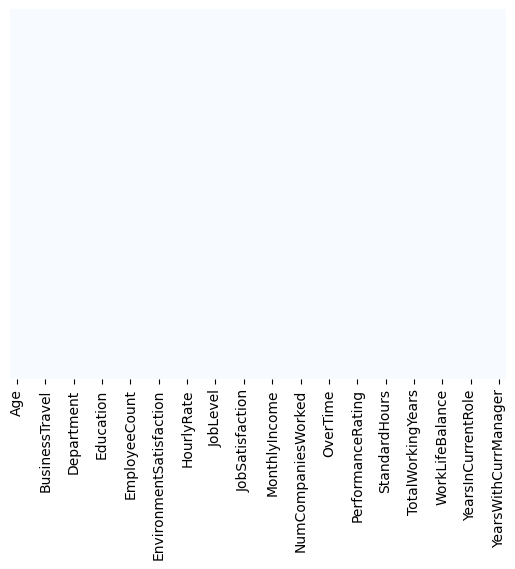

In [414]:
# Visual way to check null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

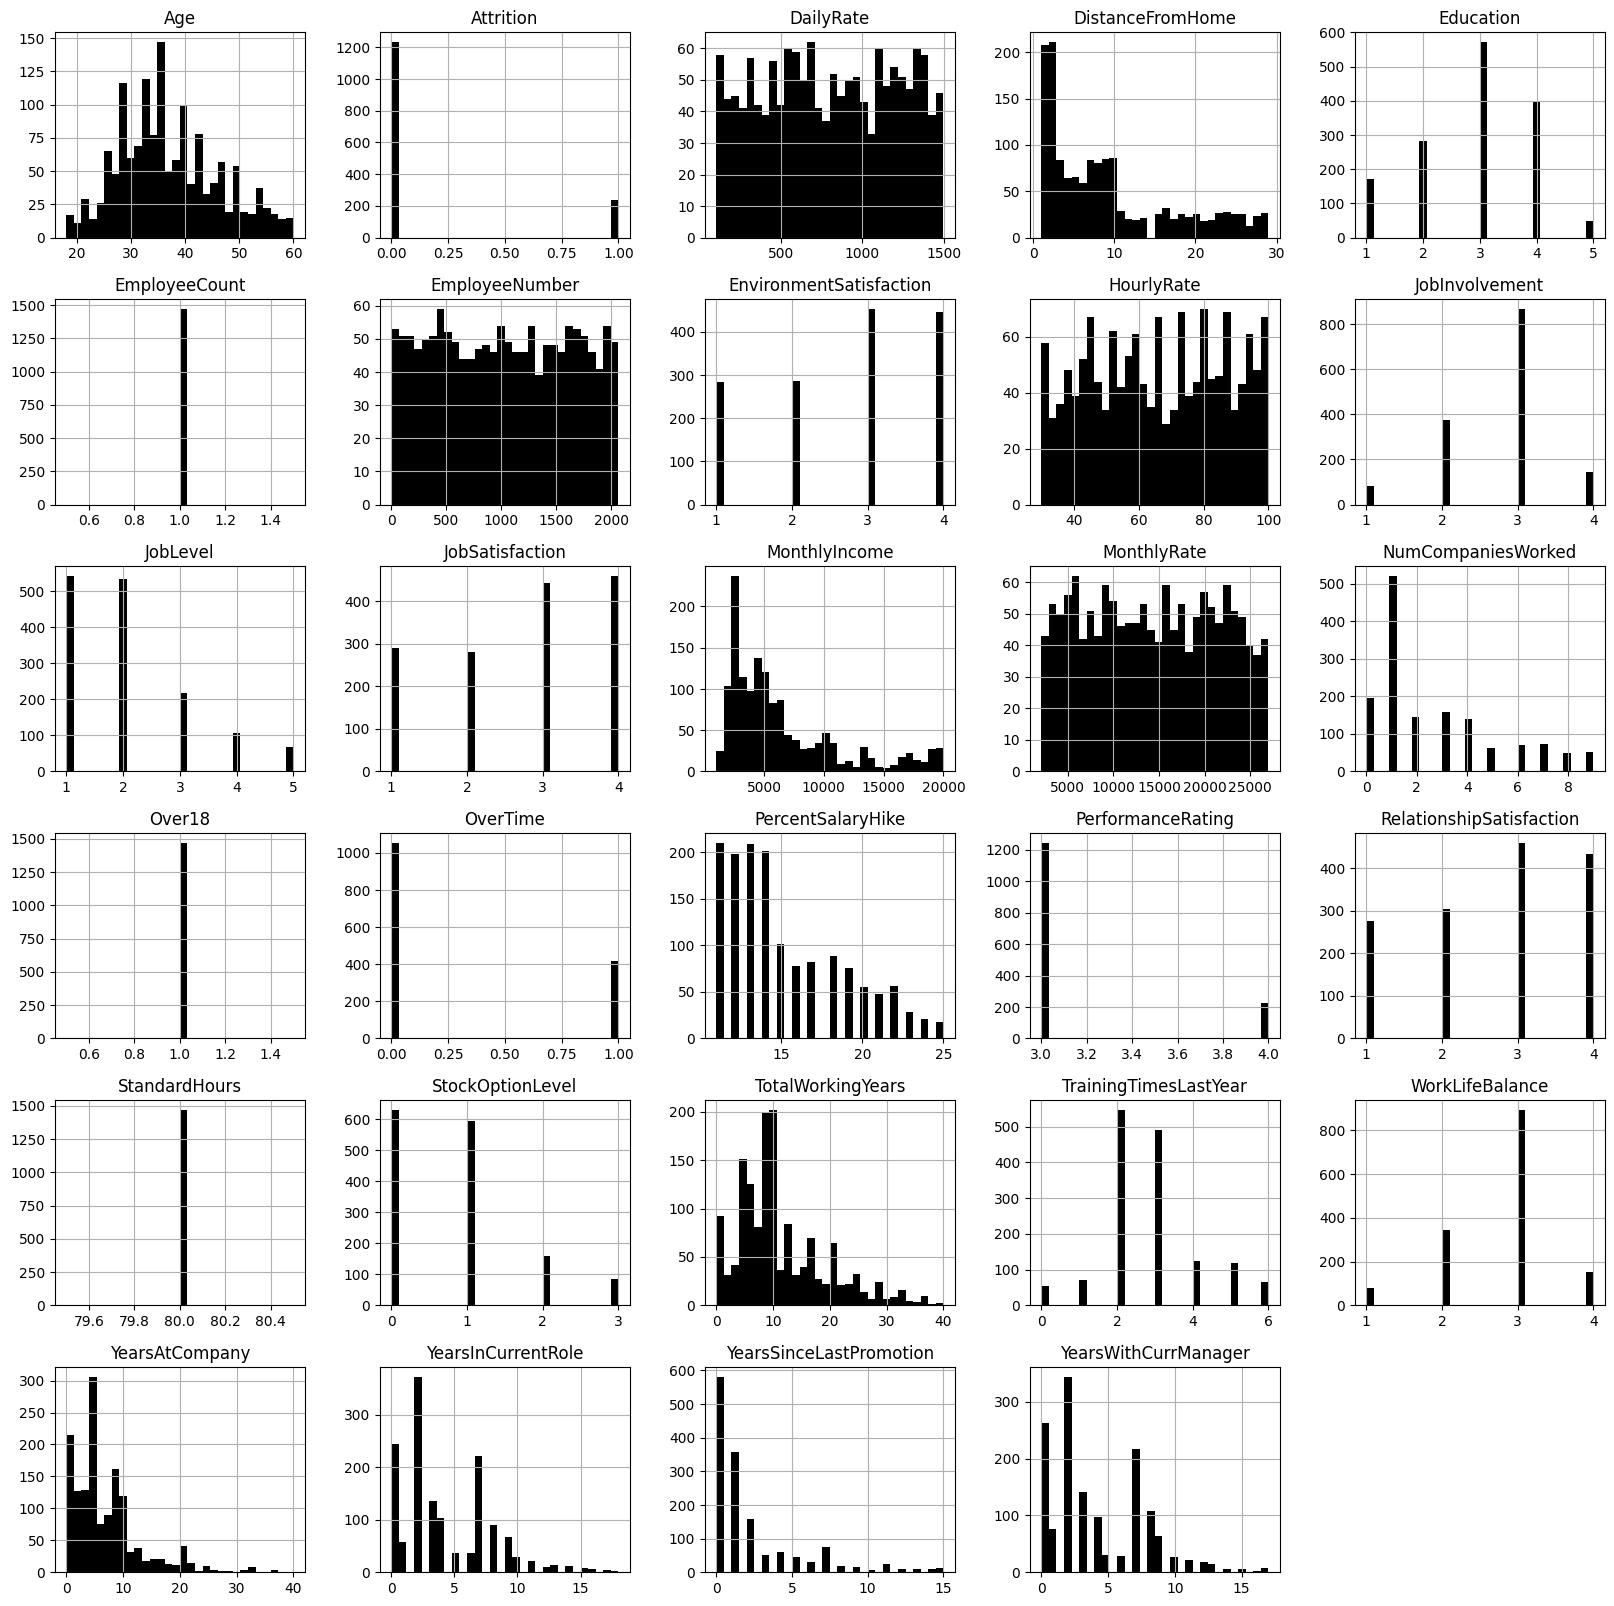

In [415]:
df.hist(bins=30, figsize=(20, 20), color='black')

In [416]:
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy

In [417]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well


In [418]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [419]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [420]:
df.shape

(1470, 31)

In [421]:
# Let's see how many employees left the company!
left_df = df[df['Attrition'] == 1]
stayed_df = df[df['Attrition'] == 0]

In [422]:
# Let's count the number of employees who stayed and left


In [423]:
print(f"Total employee count: {len(df)}")
print(f"Employee left count: {len(left_df)}")
print(f"Percentage of employee left: {(len(left_df)/len(df))*100:.2f}%")

Total employee count: 1470
Employee left count: 237
Percentage of employee left: 16.12%


In [424]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [425]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [426]:
#  Let's compare the mean and std of the employees who stayed and left
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

In [427]:
left_df["Age"].describe()

count    237.000000
mean      33.607595
std        9.689350
min       18.000000
25%       28.000000
50%       32.000000
75%       39.000000
max       58.000000
Name: Age, dtype: float64

In [428]:
stayed_df["Age"].describe()

count    1233.000000
mean       37.561233
std         8.888360
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

<Axes: >

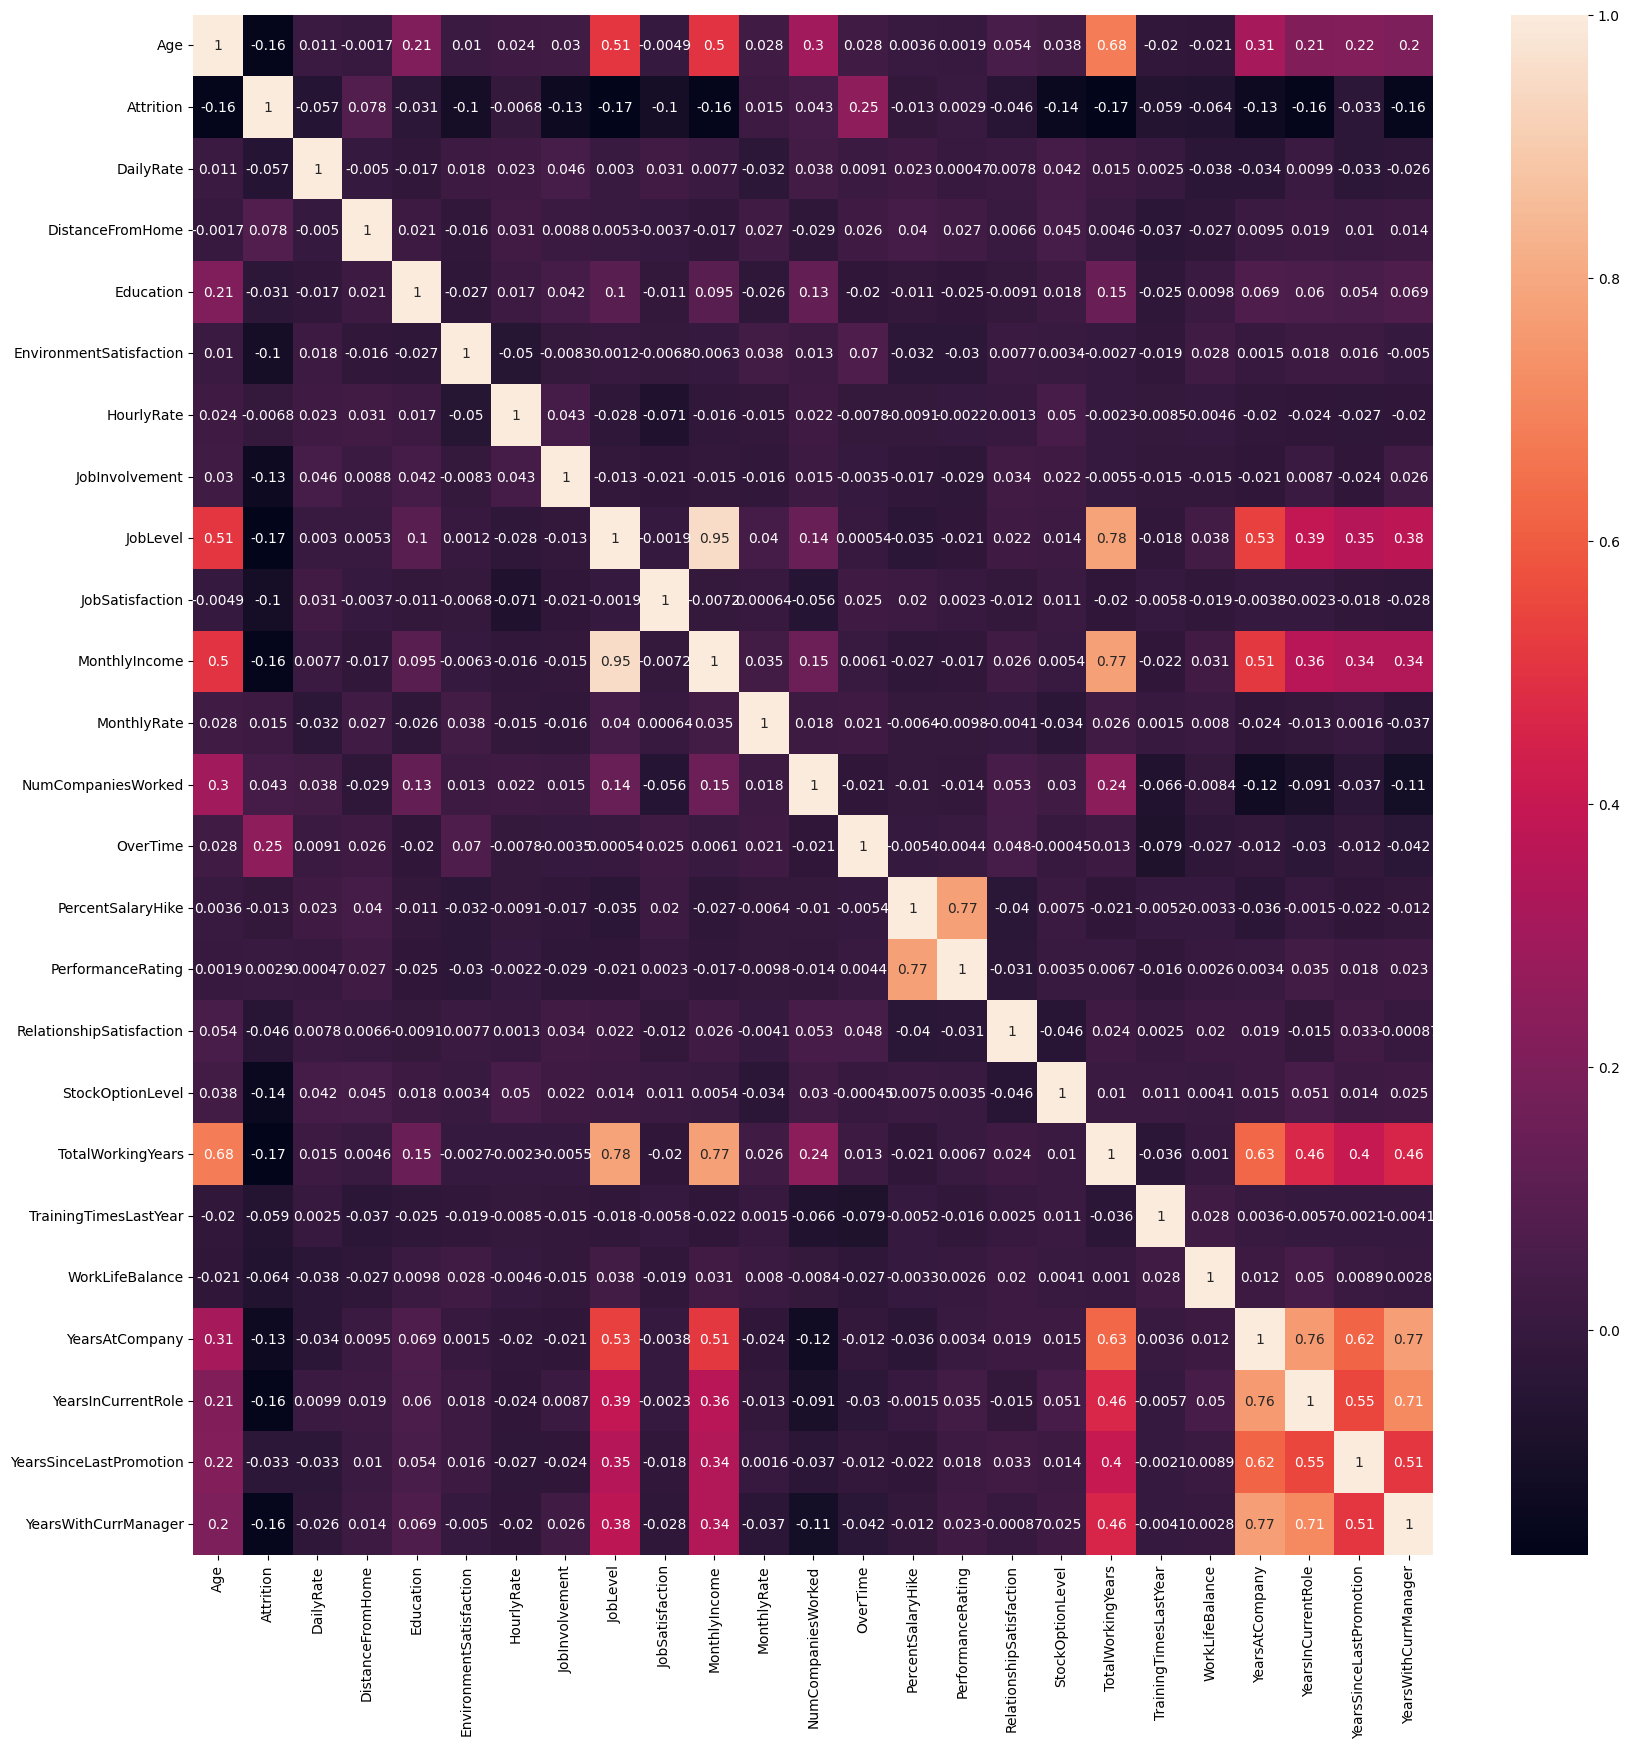

In [429]:
correlations = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(correlations, annot=True)



In [430]:
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income

<Axes: xlabel='Age', ylabel='count'>

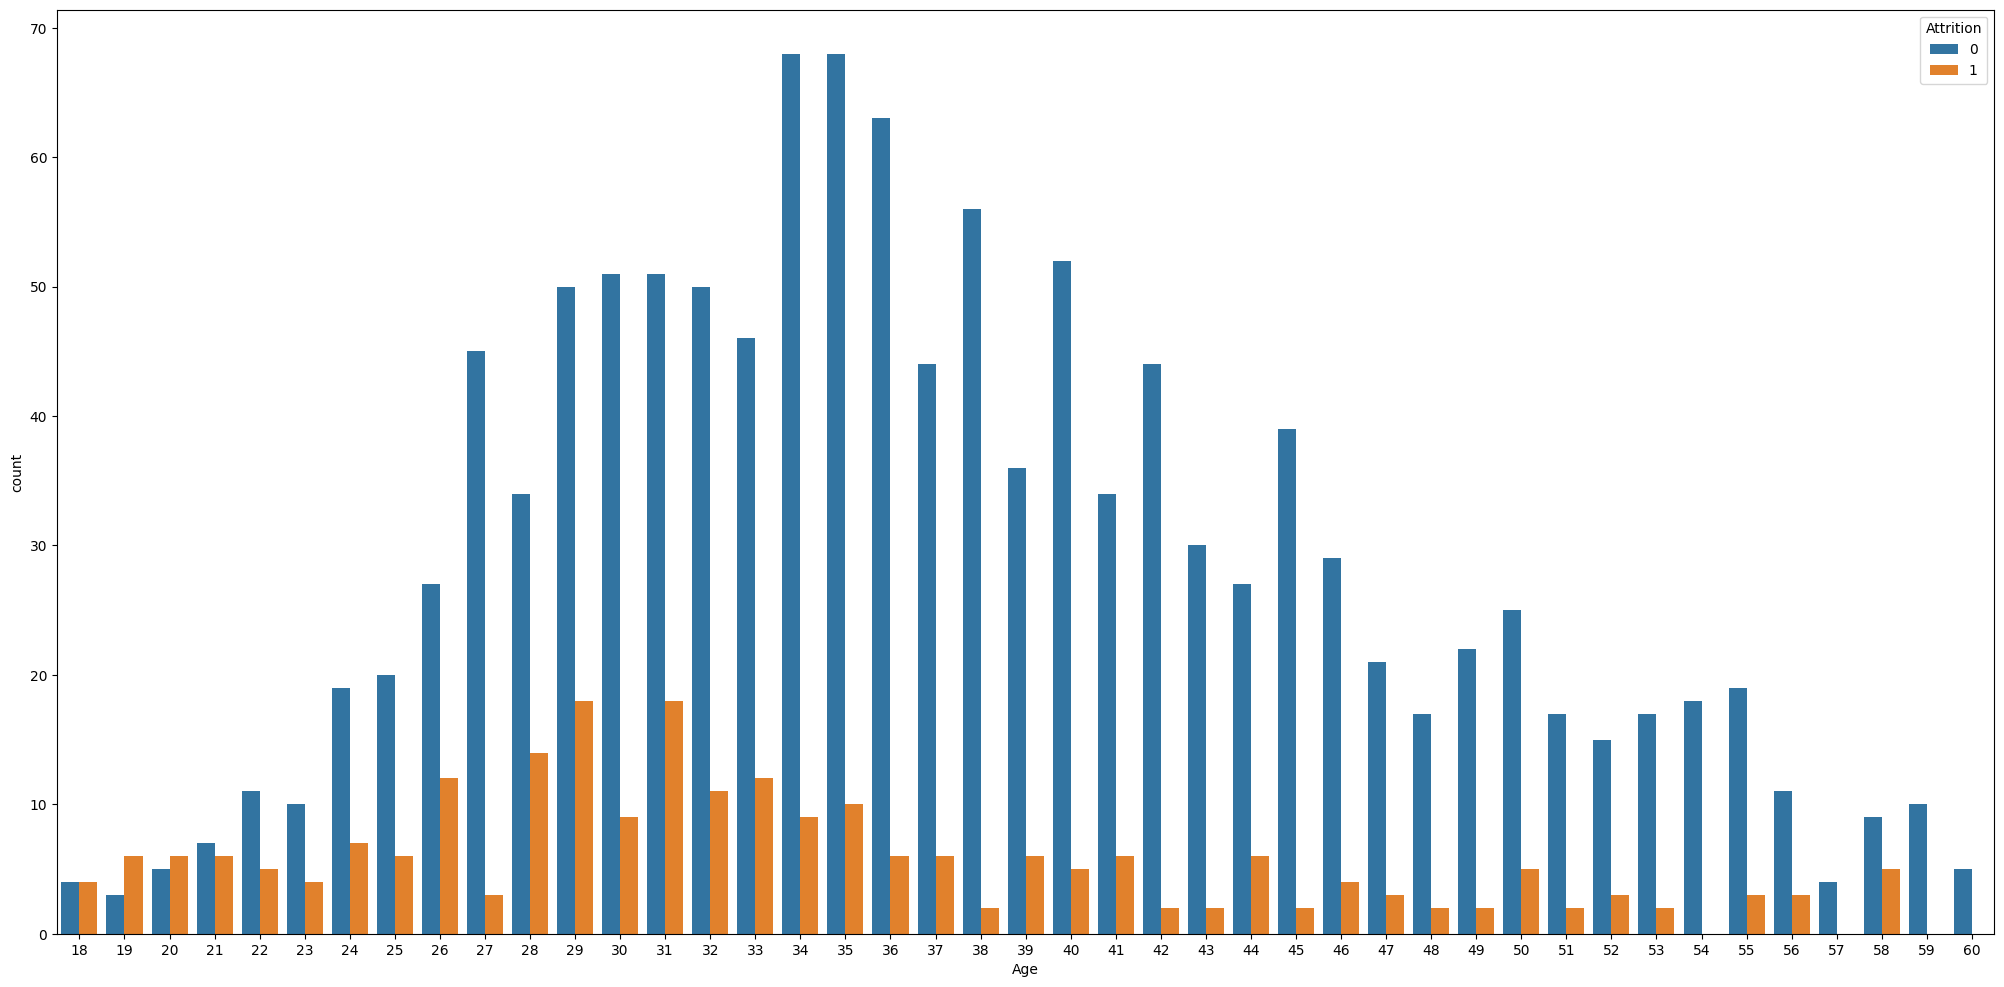

In [431]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue= 'Attrition', data=df)

<Axes: xlabel='JobLevel', ylabel='count'>

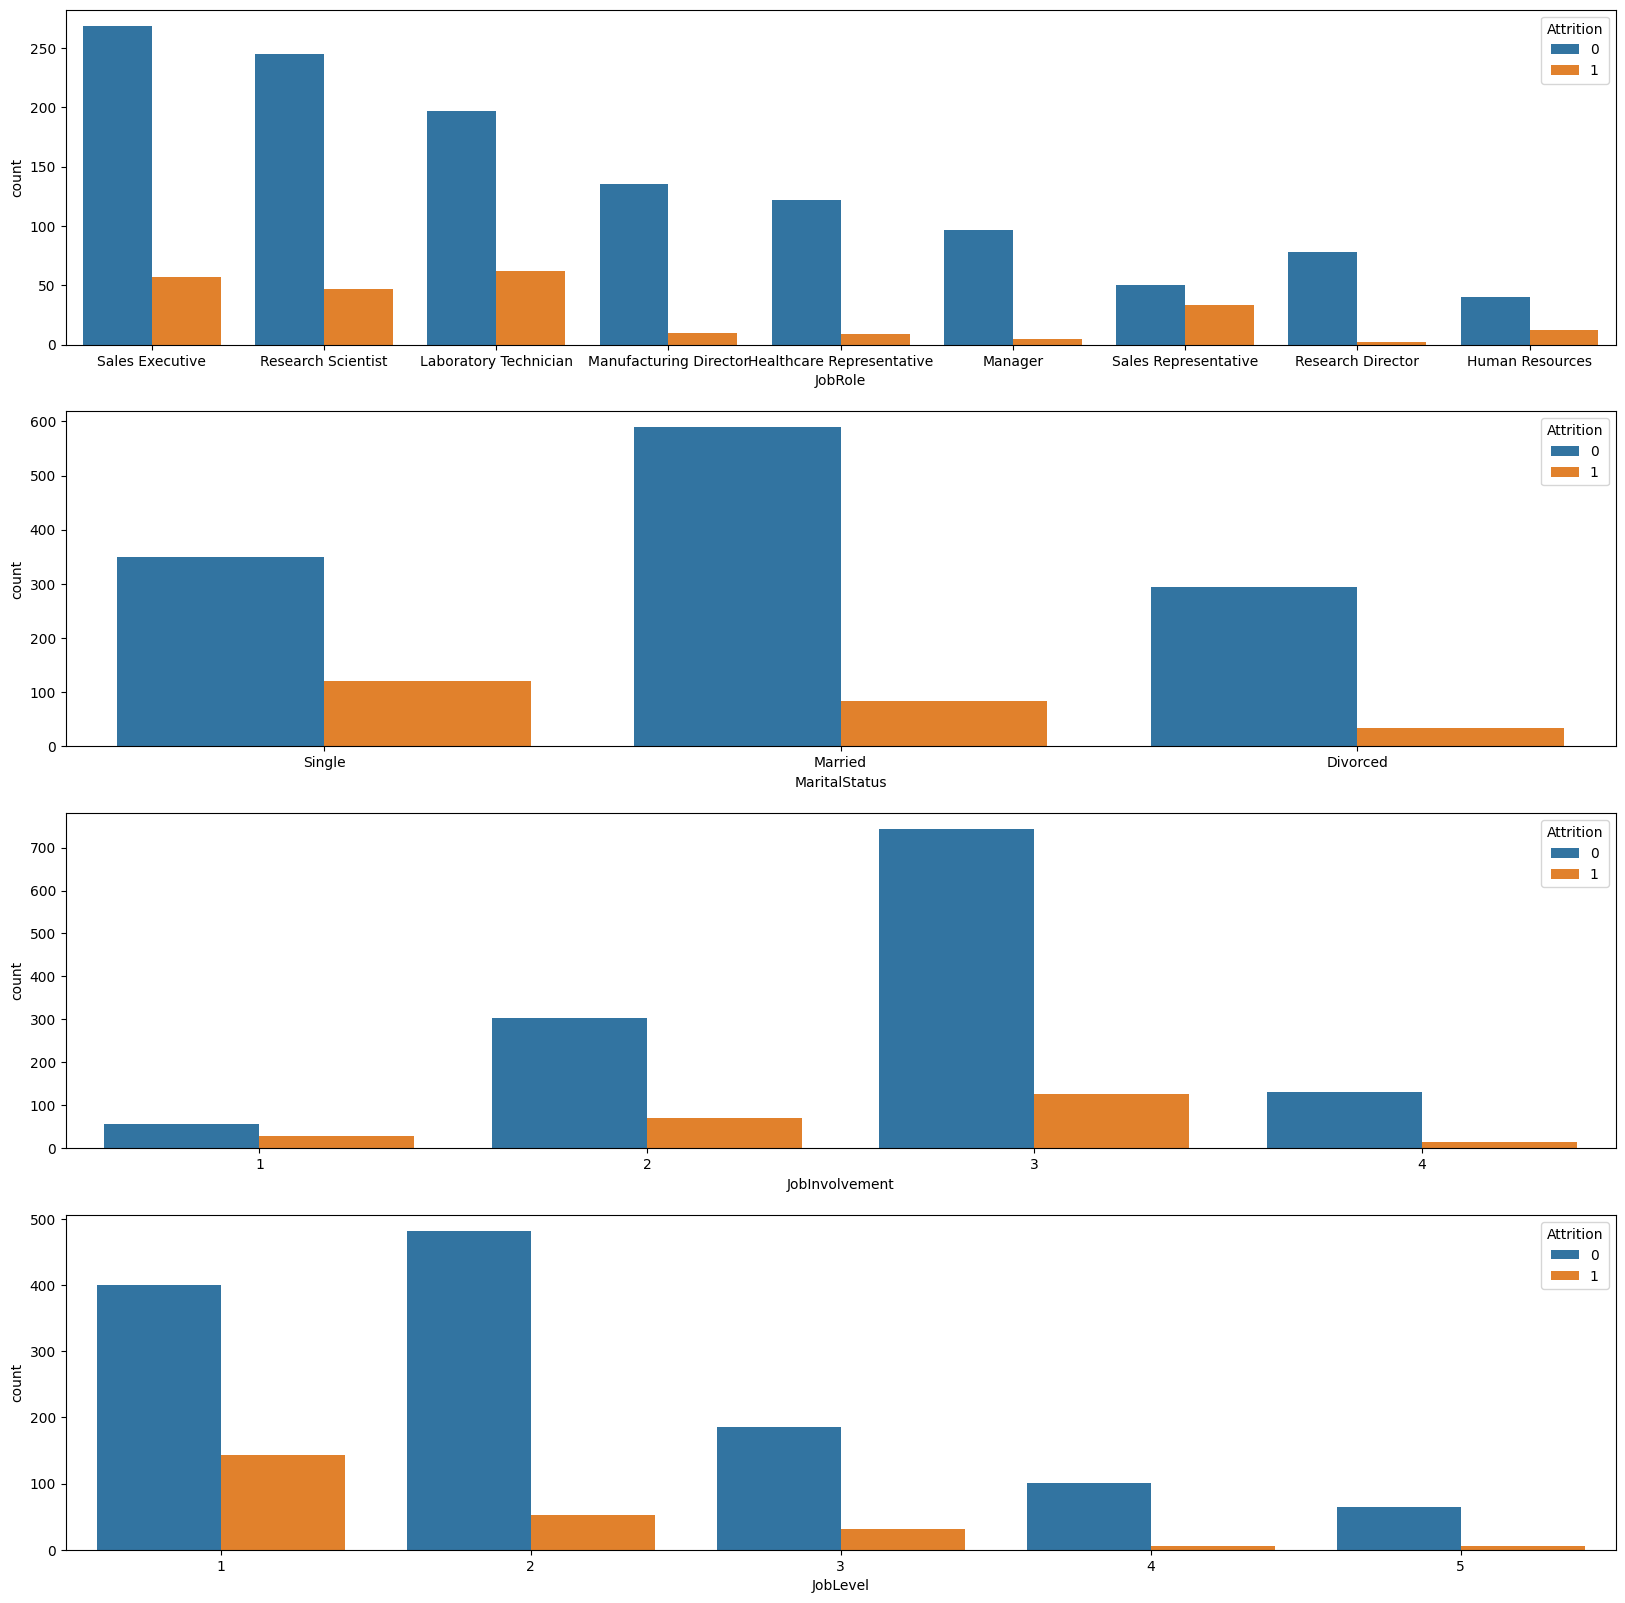

In [432]:
plt.figure(figsize=[20, 20])

plt.subplot(411)
sns.countplot(x= 'JobRole', hue= 'Attrition', data=df)

plt.subplot(412)
sns.countplot(x= 'MaritalStatus', hue= 'Attrition', data=df)

plt.subplot(413)
sns.countplot(x= 'JobInvolvement', hue= 'Attrition', data=df)

plt.subplot(414)
sns.countplot(x= 'JobLevel', hue= 'Attrition', data=df)

In [433]:
# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job
# Less involved employees tend to leave the company
# Less experienced (low job level) tend to leave the company

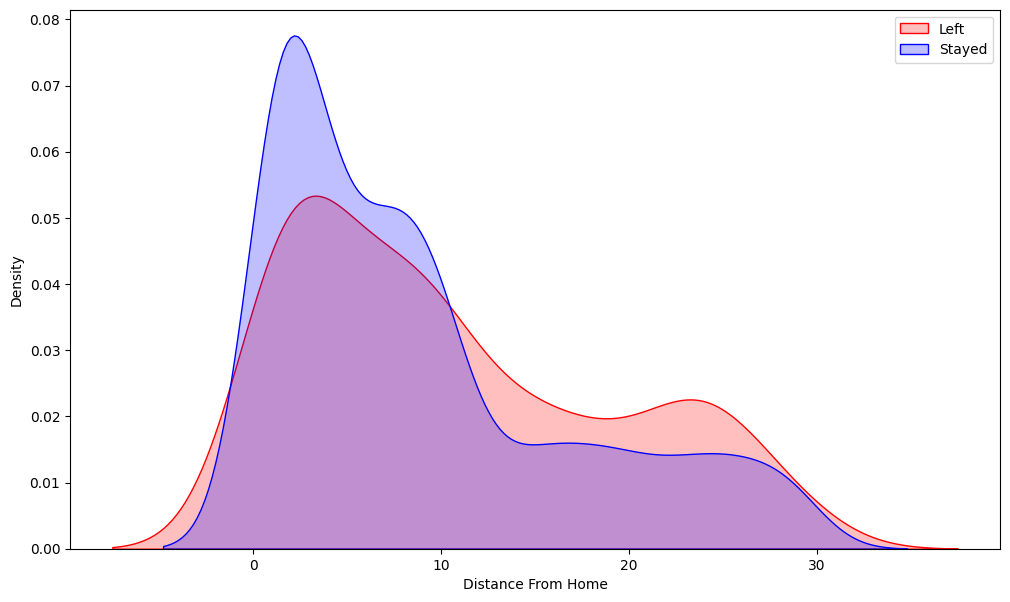

In [434]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous varaible.

plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['DistanceFromHome'], label= 'Left', fill=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label= 'Stayed', fill=True, color='b')
plt.xlabel("Distance From Home")
plt.legend()


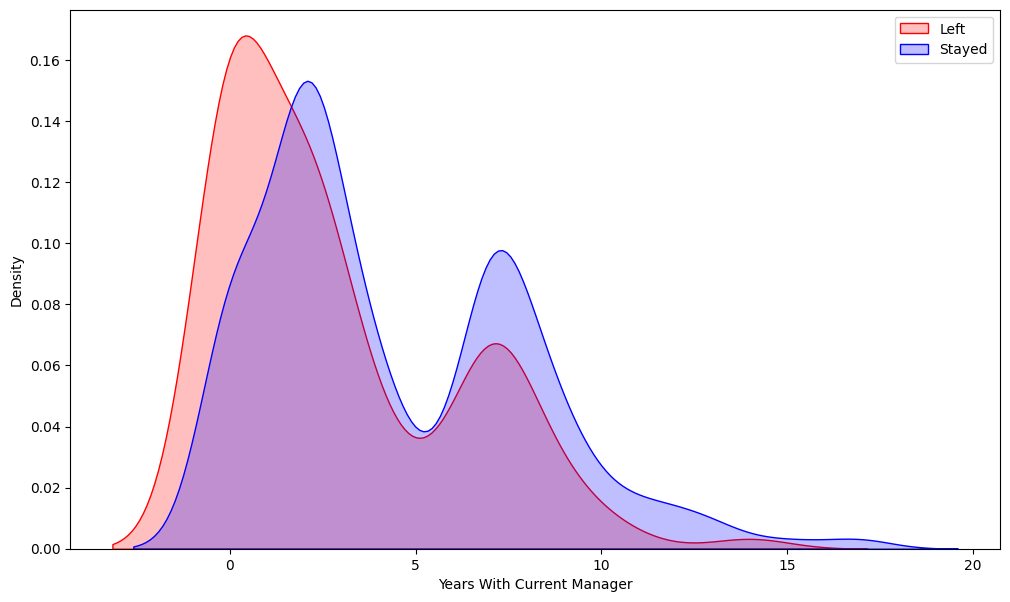

In [435]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['YearsWithCurrManager'], label= 'Left', fill=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label= 'Stayed', fill=True, color='b')
plt.xlabel("Years With Current Manager")
plt.legend()


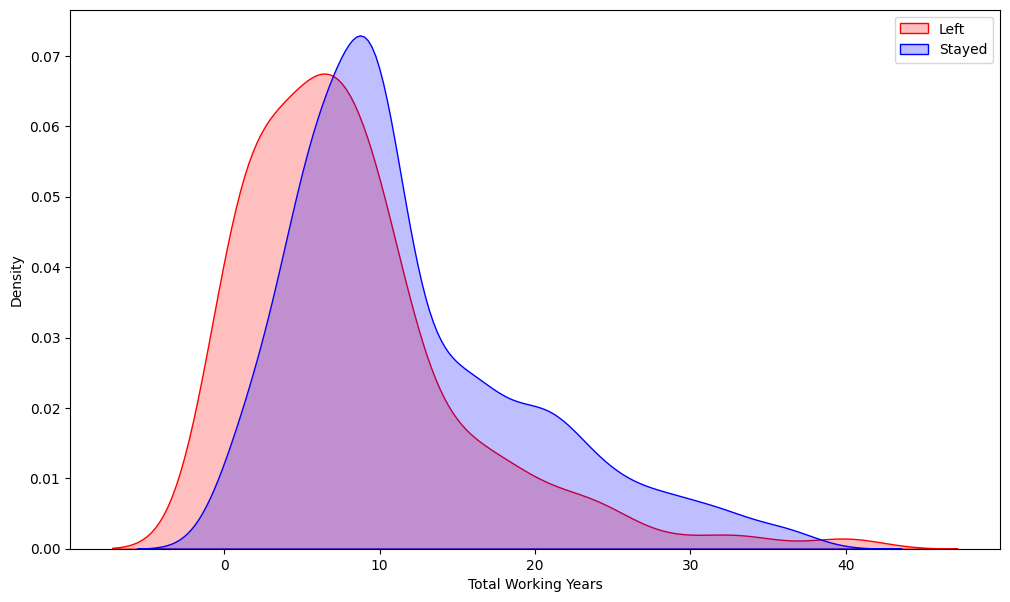

In [436]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['TotalWorkingYears'], label= 'Left', fill=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label= 'Stayed', fill=True, color='b')
plt.xlabel("Total Working Years")
plt.legend()


<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

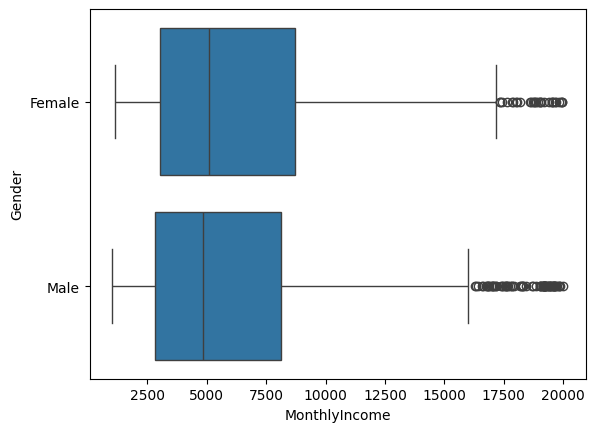

In [437]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x='MonthlyIncome', y="Gender", data=df)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

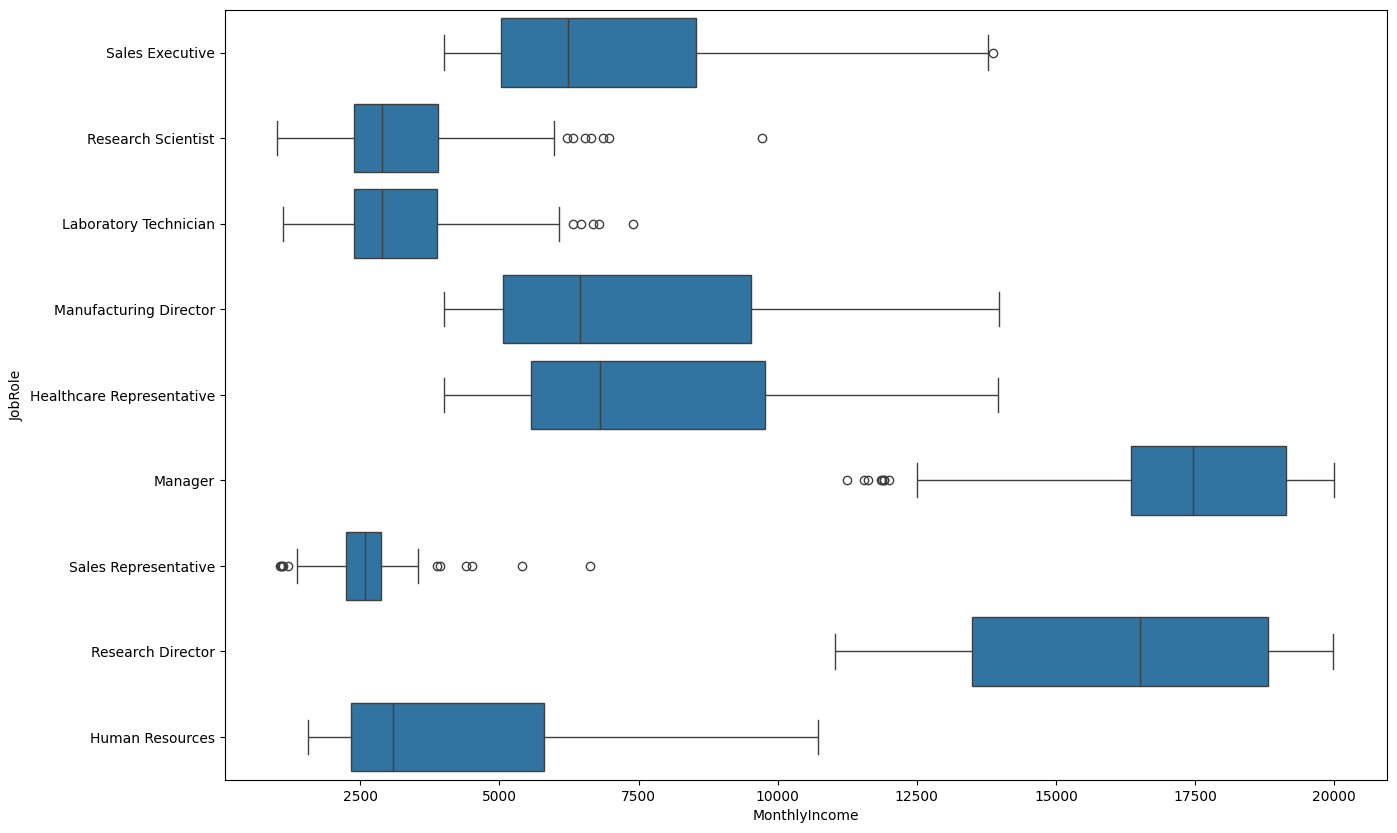

In [438]:
# Let's see the Job Role vs. Monthly Income
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y="JobRole", data=df)

## CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [439]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [440]:
x_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [441]:
x_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [442]:
# Let's do One Hot Encoding
x_cat = OneHotEncoder().fit_transform(x_cat).toarray()
x_cat.shape

(1470, 26)

In [443]:
x_cat = pd.DataFrame(x_cat)
x_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [444]:
x_numerical = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel',  'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
X_all = pd.concat([x_cat, x_numerical], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


In [445]:
# Note that we dropped the target 'Atrittion' as it is the variable we want to predict

In [446]:
# Let's normalize the data

In [447]:
X_all.columns = X_all.columns.astype(str)
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [448]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [449]:
y = df['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

# TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [451]:
X_train.shape

(1102, 50)

In [452]:
X_test.shape

(368, 50)

In [453]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [454]:
y_pred = log_model.predict(X_test)

In [455]:
print(f"Accuracy: {100*accuracy_score(y_pred, y_test):.2f}%")

Accuracy: 88.32%


<Axes: >

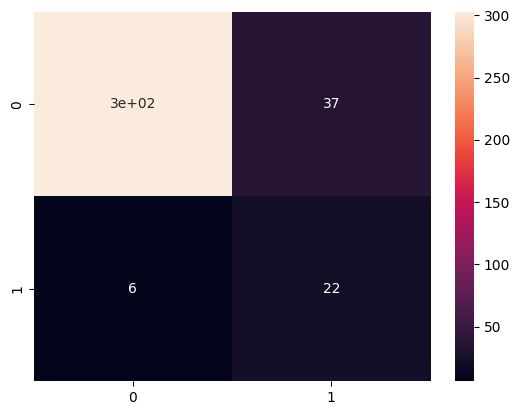

In [456]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [457]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       309
           1       0.79      0.37      0.51        59

    accuracy                           0.88       368
   macro avg       0.84      0.68      0.72       368
weighted avg       0.87      0.88      0.87       368



In [458]:
# F1 score is pretty good but recall is not that impressive so maybe we can try random forest


# TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [459]:

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [460]:
y_pred = rf_model.predict(X_test)

Accuracy: 84.78%
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       309
           1       0.60      0.15      0.24        59

    accuracy                           0.85       368
   macro avg       0.73      0.57      0.58       368
weighted avg       0.82      0.85      0.81       368



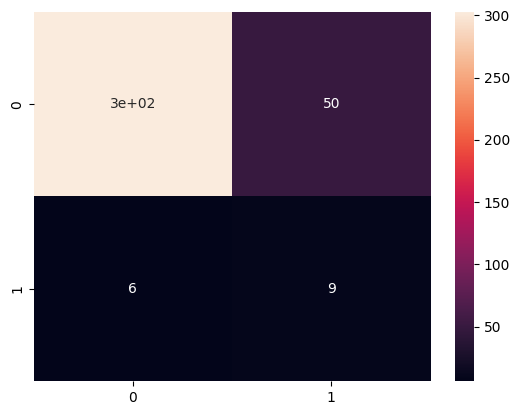

In [461]:
# Testing Set Performance
print(f"Accuracy: {100*accuracy_score(y_pred, y_test):.2f}%")
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

# TASK #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL

In [462]:
nn_model = tf.keras.models.Sequential()


In [463]:
nn_model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
nn_model.add(tf.keras.layers.Dense(units=500, activation='relu'))
nn_model.add(tf.keras.layers.Dense(units=500, activation='relu'))
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


/Users/eishaenan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [464]:
nn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 500)            │        25,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 527,001 (2.01 MB)

 Trainable params: 527,001 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [465]:
nn_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [466]:
epochs_hist = nn_model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8424 - loss: 0.4601
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8518 - loss: 0.3966
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8938 - loss: 0.3105 
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8787 - loss: 0.3015
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8875 - loss: 0.2902
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8994 - loss: 0.2581
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9266 - loss: 0.2174
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9241 - loss: 0.2007
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9357 - loss: 0.1575
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9559 - loss: 0.1255
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9676 - loss: 0.1071
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [467]:
y_pred = nn_model.predict(X_test)
y_pred = (y_pred>0.5)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [468]:
y_pred[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False]])

Text(0, 0.5, 'Loss')

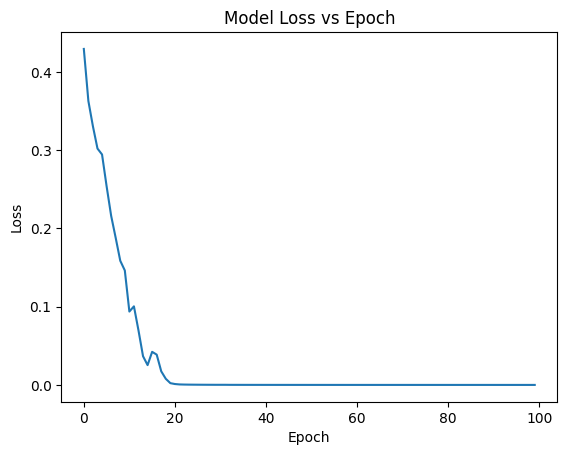

In [469]:
plt.plot(epochs_hist.history['loss'])
plt.title("Model Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel('Loss')


Text(0, 0.5, 'Accuracy')

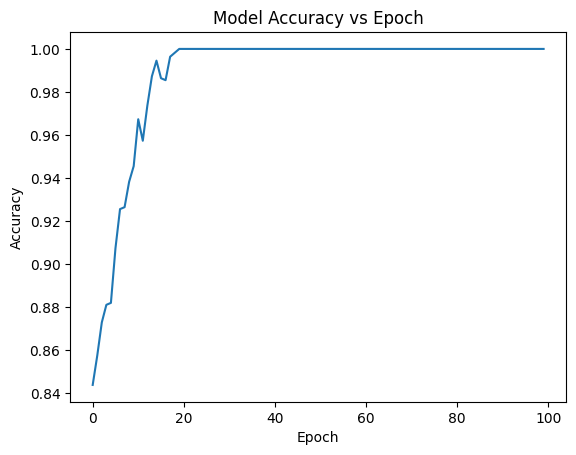

In [470]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Model Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel('Accuracy')

<Axes: >

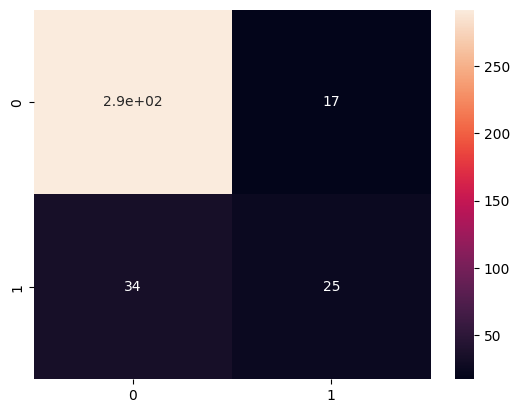

In [471]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [472]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       309
           1       0.60      0.42      0.50        59

    accuracy                           0.86       368
   macro avg       0.75      0.68      0.71       368
weighted avg       0.85      0.86      0.85       368



---

## Conclusion

### Model Comparison and Selection

In this study, we evaluated three different models—**Logistic Regression, Random Forest, and a Neural Network**—to predict employee attrition. The classification reports for each model indicate the following key insights:

1. **Logistic Regression**:
   - Achieved an accuracy of **88%**.
   - **High precision (0.89) and recall (0.98) for non-quitting employees (Class 0)**.
   - **Moderate precision (0.79) but low recall (0.37) for quitting employees (Class 1)**.
   - Performs well overall but struggles with recall for predicting employees who are likely to quit.

2. **Random Forest**:
   - Achieved an accuracy of **85%**.
   - **Precision for Class 1 (0.60) is lower, and recall (0.15) is significantly poor**, making it ineffective at predicting employees likely to leave.
   - This model is more biased toward predicting employees who stay, reducing its usefulness in attrition prediction.

3. **Neural Network**:
   - Achieved an accuracy of **86%**.
   - **Balanced performance between precision (0.60) and recall (0.42) for quitting employees (Class 1)**.
   - This model captures more quitting employees than Random Forest but still has room for improvement.

### Final Recommendation

Based on the results, **Logistic Regression provides the best overall accuracy (88%)** and performs well for predicting employees who stay. However, its recall for quitting employees is still low (**0.37**), meaning it misses many actual attrition cases.

If the goal is to **maximize recall for quitting employees**, the **Neural Network is the best option** as it provides a more balanced prediction between staying and leaving employees. However, it still requires further optimization.

To improve predictions, **cost-sensitive learning, resampling techniques (SMOTE), or feature engineering** could be applied to enhance recall for quitting employees while maintaining overall performance.

---

